In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

import warnings

warnings.filterwarnings('ignore')
sns.set_style('whitegrid')

In [2]:
df = pd.read_csv('/Users/maiiayakusheva/Downloads/sp_sales_task/sales_df_train.csv')

In [3]:
df.head()

,st_id,pr_sku_id,date,pr_sales_type_id,pr_sales_in_units,pr_promo_sales_in_units,pr_sales_in_rub,pr_promo_sales_in_rub
0,c81e728d9d4c2f636f067f89cc14862c,c7b711619071c92bef604c7ad68380dd,2022-10-20,1,5.0,5.0,825.0,825.0
1,42a0e188f5033bc65bf8d78622277c4e,68f441429e73dbd33b81f95da31576e9,2023-01-29,0,4.0,0.0,196.0,0.0
2,1ecfb463472ec9115b10c292ef8bc986,22988026fe85fde60d8bf777ab6bc3b4,2023-03-02,0,1.0,0.0,78.0,0.0
3,42a0e188f5033bc65bf8d78622277c4e,8e887cf8e64ab8e7173701a979476567,2023-04-05,1,0.0,0.0,69.0,69.0
4,16a5cdae362b8d27a1d8f8c7b78b4330,e6fc24ca846339d204b0b50e9f772484,2023-02-17,0,1.0,0.0,161.0,0.0


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 883015 entries, 0 to 883014
Data columns (total 8 columns):
 #   Column                   Non-Null Count   Dtype  
---  ------                   --------------   -----  
 0   st_id                    883015 non-null  object 
 1   pr_sku_id                883015 non-null  object 
 2   date                     883015 non-null  object 
 3   pr_sales_type_id         883015 non-null  int64  
 4   pr_sales_in_units        883015 non-null  float64
 5   pr_promo_sales_in_units  883015 non-null  float64
 6   pr_sales_in_rub          883015 non-null  float64
 7   pr_promo_sales_in_rub    883015 non-null  float64
dtypes: float64(4), int64(1), object(3)
memory usage: 53.9+ MB


In [5]:
df.pr_sku_id.nunique()

1991

In [6]:
df.st_id.nunique()

12

In [7]:
df.date = pd.to_datetime(df.date)

- тренировочный датасет содержит 883015 строк и 8 столбцов с данными. Данные не содержат пропусков и дубликатов. Привела столбец с датами к временному типу.

***Предварительный анализ и предобработка тренировочного датасета:***

In [8]:
sns.set_palette("Set2")

распределения категориальных признаков


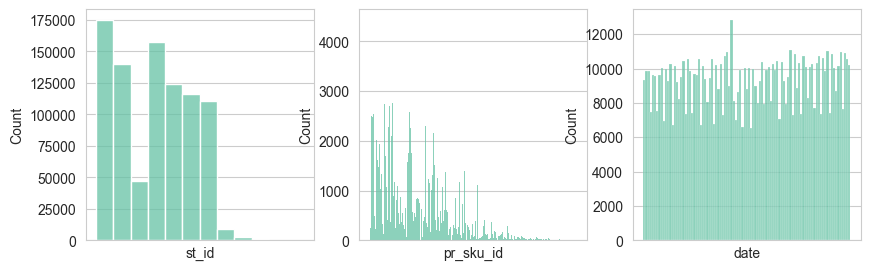

In [9]:
print('распределения категориальных признаков')
fig, axs = plt.subplots(ncols=3, figsize=(10, 3))
sns.histplot(data=df.st_id, ax=axs[0]).set_xticks([])
sns.histplot(data=df.pr_sku_id, ax=axs[1]).set_xticks([])
sns.histplot(data=df.date, ax=axs[2]).set_xticks([]);

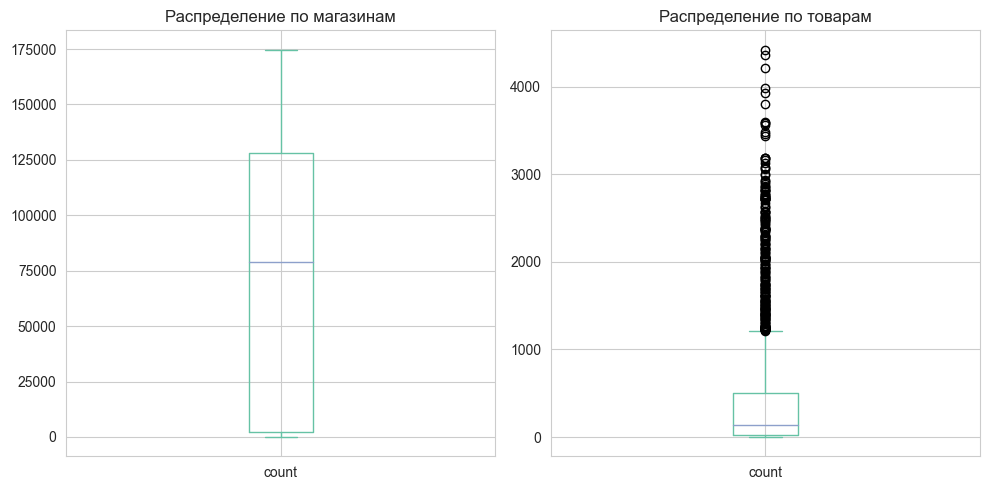

In [10]:
fig, axs = plt.subplots(ncols=2, figsize=(10, 5))
font_size=10
df.st_id.value_counts().plot.box(fontsize=font_size, ax=axs[0]).set_title('Распределение по магазинам')
df.pr_sku_id.value_counts().plot.box(fontsize=font_size, ax=axs[1]).set_title('Распределение по товарам')
fig.tight_layout()

- уже видим, что распределение продаж в некоторых магазинах и некоторых товаров значительно отличаются, то же самое видно и во временных рядах, посмотрим на цифры:

In [11]:
df.st_id.value_counts().to_frame(name='Итого:')

,Итого:
st_id,
c81e728d9d4c2f636f067f89cc14862c,174687
16a5cdae362b8d27a1d8f8c7b78b4330,157542
42a0e188f5033bc65bf8d78622277c4e,140286
f7e6c85504ce6e82442c770f7c8606f0,124145
6364d3f0f495b6ab9dcf8d3b5c6e0b01,115830
fa7cdfad1a5aaf8370ebeda47a1ff1c3,110537
1ecfb463472ec9115b10c292ef8bc986,47404
53e19f3dbb211f20b20b45668303c1b6,9231
bd470ca955d9497bbcb808e59952fffc,2586


In [12]:
df.pr_sku_id.value_counts().to_frame(name='Итого:')

,Итого:
pr_sku_id,
62d4af457ba2540ce0898a211c0cd17a,4424
ced0c1a84924c982a6403870c54b99ca,4362
cf91eca9321c9c272fb4e7cf4bcc6a43,4213
5b26f85ccb23039364226f66f0366c66,3982
6b1344097385a42484abd4746371e416,3929
...,...
8878e97692da06941dedcf44c1f50668,1
e18fadbb06e89f6f03545537c02b8bee,1
a4f2ee628051a3b73d6e1003ff6eaa5b,1


In [13]:
df.date.value_counts().to_frame(name='Итого:')

,Итого:
date,
2022-12-30,3396
2022-12-29,3322
2022-12-24,3233
2022-12-28,3126
2023-06-23,3033
...,...
2023-01-03,2083
2023-04-17,2070
2023-01-09,2041


- теперь посмотрим на распределение численных признаков тренировочного датасета:

In [14]:
df.pr_sales_type_id.value_counts().to_frame(name='Итого:')

,Итого:
pr_sales_type_id,
0,524082
1,358933


распределения численных признаков


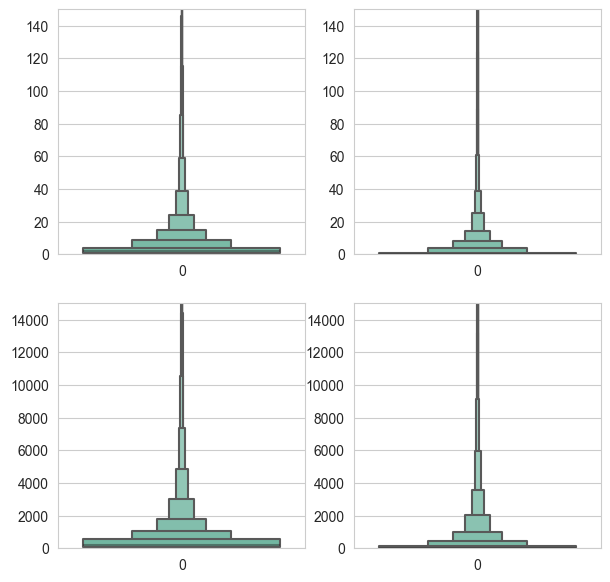

In [15]:
print('распределения численных признаков')
fig, axs = plt.subplots(nrows=2, ncols=2, figsize=(7, 7))
sns.boxenplot(data=df.pr_sales_in_units, ax=axs[0,0]).set_ylim(0, 150)
sns.boxenplot(data=df.pr_promo_sales_in_units, ax=axs[0,1]).set_ylim(0, 150)
sns.boxenplot(data=df.pr_sales_in_rub, ax=axs[1,0]).set_ylim(0, 15000)
sns.boxenplot(data=df.pr_promo_sales_in_rub, ax=axs[1,1]).set_ylim(0, 15000);

распределения численных признаков


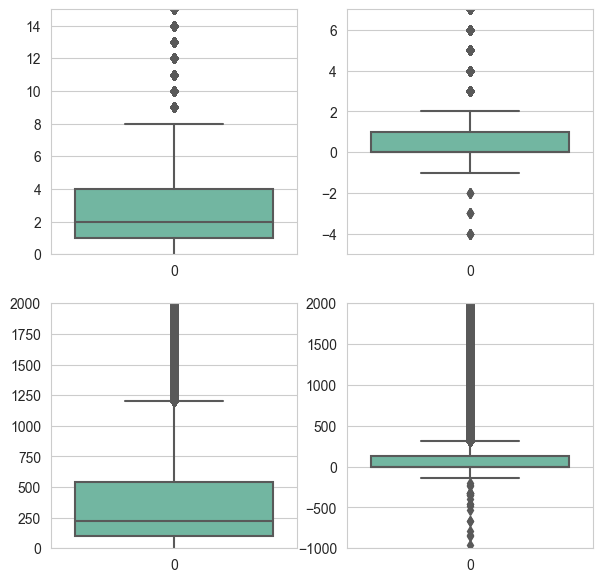

In [16]:
print('распределения численных признаков')
fig, axs = plt.subplots(nrows=2, ncols=2, figsize=(7, 7))
sns.boxplot(data=df.pr_sales_in_units, ax=axs[0,0]).set_ylim(0, 15)
sns.boxplot(data=df.pr_promo_sales_in_units, ax=axs[0,1]).set_ylim(-5, 7)
sns.boxplot(data=df.pr_sales_in_rub, ax=axs[1,0]).set_ylim(0, 2000)
sns.boxplot(data=df.pr_promo_sales_in_rub, ax=axs[1,1]).set_ylim(-1000, 2000);

In [17]:
df[['pr_sales_in_units', 'pr_promo_sales_in_units', 'pr_sales_in_rub', 'pr_promo_sales_in_rub']].describe()

,pr_sales_in_units,pr_promo_sales_in_units,pr_sales_in_rub,pr_promo_sales_in_rub
count,883015.000000,883015.000000,883015.000000,883015.000000
mean,5.037956,2.230010,596.705181,294.766561
std,13.402984,11.063288,1577.366179,1402.764168
min,-39.000000,-39.000000,-3373.000000,-3373.000000
25%,1.000000,0.000000,98.000000,0.000000
50%,2.000000,0.000000,224.000000,0.000000
75%,4.000000,1.000000,540.000000,127.000000
max,2348.000000,2348.000000,183265.000000,183265.000000


In [18]:
df[(df.pr_sales_in_units==0)&(df.pr_sales_in_rub!=0)].pr_sales_in_rub.count()

66089

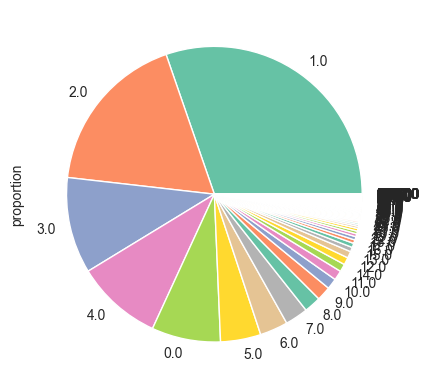

In [19]:
df.pr_sales_in_units.value_counts(vars).plot(kind='pie');

In [20]:
df[df.pr_sales_in_units<0].pr_sales_in_units.count()

71

In [21]:
df[(df.pr_promo_sales_in_units==0)&(df.pr_promo_sales_in_rub>0)].pr_sales_in_rub.to_frame(name='Продажи при нулевом количестве')

,Продажи при нулевом количестве
3,69.0
38,136.0
75,48.0
97,32.0
115,84.0
...,...
882924,61.0
882978,30.0
882991,70.0
883004,41.0


In [22]:
df[df.pr_promo_sales_in_units<0].pr_promo_sales_in_units.count()

35

In [23]:
df[(df.pr_sales_in_rub==0)&(df.pr_sales_in_units>0)].pr_sales_in_rub.count()

794

In [24]:
df[df.pr_sales_in_rub<0].pr_sales_in_rub.count()

78

In [25]:
df[(df.pr_promo_sales_in_rub==0)&(df.pr_promo_sales_in_units>0)].pr_promo_sales_in_rub.count()

677

In [26]:
df[df.pr_promo_sales_in_rub<0].pr_promo_sales_in_rub.count()

36

- в бинарном столбце с флагом наличия промо: примерно 60% товаров проданы без него, 40% с ним соответственно
- в распределении данных по количеству проданных единиц товаров(с промо и без) и по продажам(с промо и без) присутствуют выбросы:
  - количество проданных без промо: медиана - 2, мин 1 максимум 4, максимальное значение выброса достигает 2348, 66089(7%) строки содержат нулевые данные, несмотря на то, что продажи в этих строчках присутствуют(****в анализе нужно посмотрет на корреляции выбросов, чтобы понять это действительно выброс или нет****), есть отрицательные значения в количествах(несмотря на то, что возможно это были возвраты в день без покупок, такиx значений крайне мало - 71 штука, поэтому их удалю)
  - количество проданных с промо: среднее - 2, из-за большой дисперсии, в основном данные распределены вокруг значения 1. Также присутствуют нулевые значения при ненулевых продажах, здесь это 31006(3.5%), также есть отрицательные значения - 35 шт(также удалю)(****также в анализе нужно внимательно посмотреть на выбросы и вообще на соотношение проданных количеств с промо и без него****)
  - продажи в рублях: медиана в районе 250, распределение смещено вправо, поэтому среднее больше медианы почти в два раза(****также в анализе нужно внимательно посмотреть на выбросы и вообще на соотношение цен с промо и без него****), есть нулевые продажи при ненулевом количестве проданных единиц - 794 строки, есть отрицательные значения - 78 строк
  - продажи промо в рублях: данные очень разреженные, среднее опять вдвое больше медианы(****выбросы изучу в анализе****), 677 строк с нулевыми данными, при наличии в строке проданных единиц с промо, 36 отрицательных значений.

In [27]:
df = df[((df.pr_sales_in_units!=0)&(df.pr_sales_in_rub!=0))|\
    ((df.pr_sales_in_units==0)&(df.pr_sales_in_rub==0))]

In [28]:
df = df[(df.pr_sales_in_units>=0) & (df.pr_promo_sales_in_units>=0) & (df.pr_sales_in_rub>=0)\
     & (df.pr_promo_sales_in_rub>=0)]

In [29]:
df.shape[0]*100/883015

92.41756935046403

- Итак, я удалили данные, где не совпадало присутствие нулевых значений в столбцах с количеством и продажами, и с отрицательными значениями в этих данные(7,5% от датасета)

- теперь проверим данные на гетероскедастичность, подгоним простую модель линейной регрессии, используя количество проданных единиц в качестве зависимой переменной, предиктором выступят продажи. Построю график несвязок по сравнению с подобранным. Далее проведу тест Бреуша-Пагана, для проверки данных на гетероскедастичность:

In [30]:
import statsmodels.formula.api as smf
res = smf.ols('pr_sales_in_units ~ pr_sales_in_rub', data=df).fit()

eval_env: 1


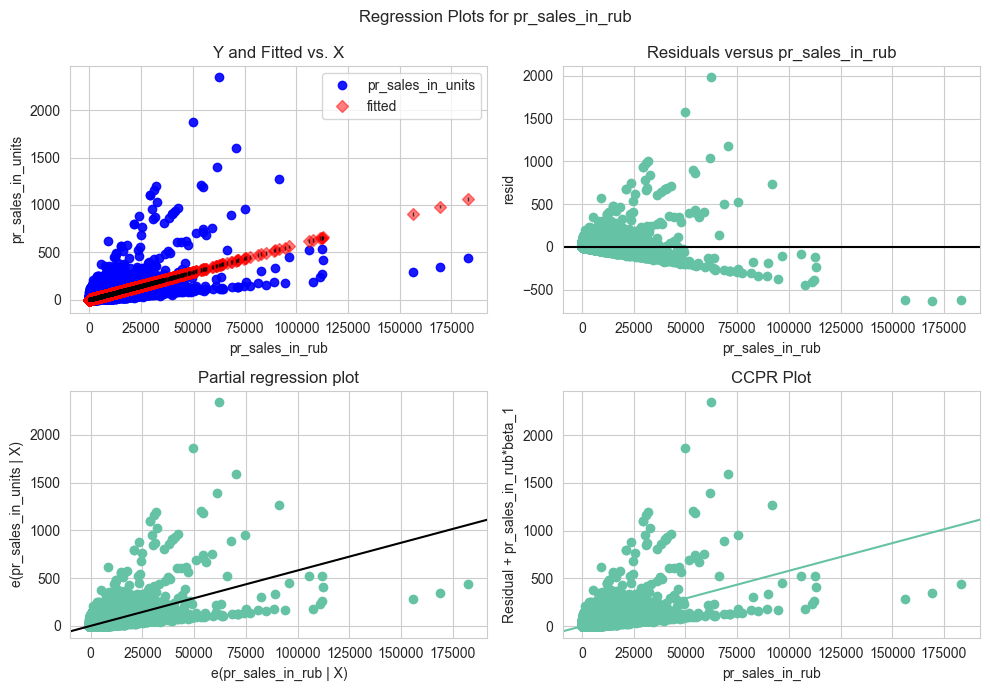

In [31]:
import statsmodels.api as sm

fig = plt.figure(figsize=(10, 7))
fig = sm.graphics.plot_regress_exog(res, 'pr_sales_in_rub', fig=fig)


- визуально заметно, что остатки становятся более разбросанными при более высоких значениях на графике, это указаывает на наличие гетероскедастичности. Но необходимо провести тест.

- Нулевая гипотеза - присутствует гомоскедастичность
- Альтернативная гипотеза - отсутствует гомоскедастичность(присутствует гетероскедастичность)

In [32]:
from statsmodels.compat import lzip
import statsmodels.stats.api as sms
names = ['Lagrange multiplier statictic', 'p-value', 'f-value', 'f p-value']
test = sms.het_breuschpagan(res.resid, res.model.exog)
lzip(names, test)

[('Lagrange multiplier statictic', 38407.41217257789),
 ('p-value', 0.0),
 ('f-value', 40304.211104723094),
 ('f p-value', 0.0)]

- p-value ниже 0.05, мы можем отвергнуть нулевую гипотезу и предположить, что в данных присутствует гетероскедастичность, так как это будет негативно сказываться на работе регрессионных моделей. Необходимо ее исправлять(преобразовывать зависимую переменную, использовать взвешенную регрессию)

****Предварительный анализ и предобработка данных по товарной иерархии:****

In [33]:
prod = pd.read_csv('/Users/maiiayakusheva/Downloads/sp_sales_task/pr_df.csv')

In [34]:
prod.sample(5)

,pr_sku_id,pr_group_id,pr_cat_id,pr_subcat_id,pr_uom_id
1207,100a9210291545e301a4e4cea156ad17,aab3238922bcc25a6f606eb525ffdc56,b7087c1f4f89e63af8d46f3b20271153,aa7420bcdec6c0ce8dc01394aaa498f2,1
81,1566bfacbcf0c0a3e7c92e73c708d341,c74d97b01eae257e44aa9d5bade97baf,1bc0249a6412ef49b07fe6f62e6dc8de,2a307e6985c82c6245bc0b3186cdf9bc,17
118,9d4d76311ae2c0cbc4b1eb53c447bed7,c74d97b01eae257e44aa9d5bade97baf,c559da2ba967eb820766939a658022c8,e06f5ed77191826c212c30722f2cc5a2,17
218,c68cce0f709db5a976ee5324bbdaec98,aab3238922bcc25a6f606eb525ffdc56,186a157b2992e7daed3677ce8e9fe40f,8d306de2ac1bbd5dd1957387ea03d821,1
329,abd61e1e82fe59815863d66ba9353ff0,c74d97b01eae257e44aa9d5bade97baf,1bc0249a6412ef49b07fe6f62e6dc8de,d407a3ebb4ab9b0d68b224486f8b8dad,17


In [35]:
prod.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2050 entries, 0 to 2049
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   pr_sku_id     2050 non-null   object
 1   pr_group_id   2050 non-null   object
 2   pr_cat_id     2050 non-null   object
 3   pr_subcat_id  2050 non-null   object
 4   pr_uom_id     2050 non-null   int64 
dtypes: int64(1), object(4)
memory usage: 80.2+ KB


In [36]:
prod.pr_uom_id.value_counts().to_frame()

,count
pr_uom_id,
1,1279
17,771


In [37]:
prod.pr_group_id.nunique()

9

In [38]:
prod.columns

Index(['pr_sku_id', 'pr_group_id', 'pr_cat_id', 'pr_subcat_id', 'pr_uom_id'], dtype='object')

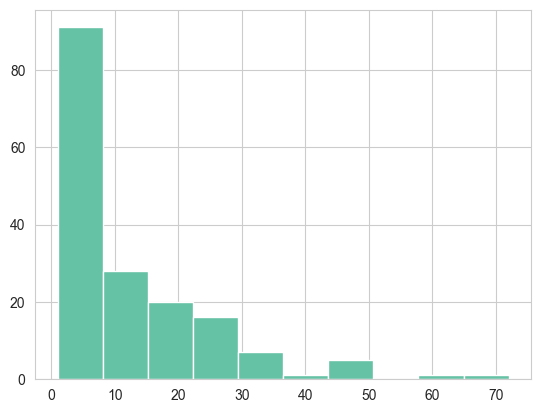

In [39]:
prod.groupby(['pr_group_id', 'pr_cat_id', 'pr_subcat_id'])['pr_sku_id'].count().hist();

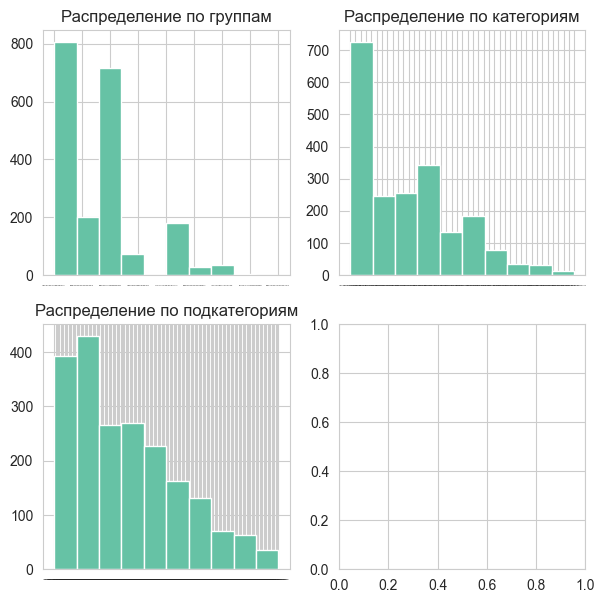

In [40]:
fig, axs = plt.subplots(nrows=2, ncols=2, figsize=(7, 7))
prod.pr_group_id.hist(xlabelsize=0, ax=axs[0,0]).set_title('Распределение по группам')
prod.pr_cat_id.hist(xlabelsize=0, ax=axs[0,1]).set_title('Распределение по категориям')
prod.pr_subcat_id.hist(xlabelsize=0, ax=axs[1,0]).set_title('Распределение по подкатегориям');

In [41]:
print('Количество групп товаров:', prod.pr_group_id.nunique(), 'Количество категорий товаров:',
 prod.pr_cat_id.nunique(), 'Количество подкатегорий товаров:', prod.pr_subcat_id.nunique(),
  'Количество товаров:', prod.pr_sku_id.nunique())

Количество групп товаров: 9 Количество категорий товаров: 43 Количество подкатегорий товаров: 170 Количество товаров: 2050


- для нахождения возможных корреляционных связей между различными категориями товаров, объединю данную таблицу с тренировочным датасетом.

****Предварительный анализ данных по магазинам:****

In [42]:
station = pd.read_csv('/Users/maiiayakusheva/Downloads/sp_sales_task/st_df.csv')

In [43]:
station

,st_id,st_city_id,st_division_code,st_type_format_id,st_type_loc_id,st_type_size_id,st_is_active
0,1aa057313c28fa4a40c5bc084b11d276,1587965fb4d4b5afe8428a4a024feb0d,81b4dd343f5880df806d4c5d4a846c64,4,3,19,0
1,bd470ca955d9497bbcb808e59952fffc,955d864a62659945cc9434898e275deb,e26072c92d8fe0738df44d571d5f5e8b,4,3,19,1
2,6364d3f0f495b6ab9dcf8d3b5c6e0b01,b8b4b727d6f5d1b61fff7be687f7970f,da742b3cfca5388aaf9af28a726a3c30,1,1,12,1
3,1ecfb463472ec9115b10c292ef8bc986,908c9a564a86426585b29f5335b619bc,429a86ff6336c144ddaf6144f52ab52c,2,1,28,1
4,16a5cdae362b8d27a1d8f8c7b78b4330,c1f75cc0f7fe269dd0fd9bd5e24f9586,296bd0cc6e735f9d7488ebc8fbc19130,1,2,8,1
5,53e19f3dbb211f20b20b45668303c1b6,955d864a62659945cc9434898e275deb,e26072c92d8fe0738df44d571d5f5e8b,4,3,20,1
6,42a0e188f5033bc65bf8d78622277c4e,b8b4b727d6f5d1b61fff7be687f7970f,da742b3cfca5388aaf9af28a726a3c30,1,1,12,1
7,c81e728d9d4c2f636f067f89cc14862c,908c9a564a86426585b29f5335b619bc,429a86ff6336c144ddaf6144f52ab52c,1,1,8,1
8,fa7cdfad1a5aaf8370ebeda47a1ff1c3,885fe656777008c335ac96072a45be15,296bd0cc6e735f9d7488ebc8fbc19130,1,1,12,1
9,f7e6c85504ce6e82442c770f7c8606f0,3202111cf90e7c816a472aaceb72b0df,32586311f16876abf92901085bd87b99,1,1,12,1


In [44]:
station.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12 entries, 0 to 11
Data columns (total 7 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   st_id              12 non-null     object
 1   st_city_id         12 non-null     object
 2   st_division_code   12 non-null     object
 3   st_type_format_id  12 non-null     int64 
 4   st_type_loc_id     12 non-null     int64 
 5   st_type_size_id    12 non-null     int64 
 6   st_is_active       12 non-null     int64 
dtypes: int64(4), object(3)
memory usage: 800.0+ bytes


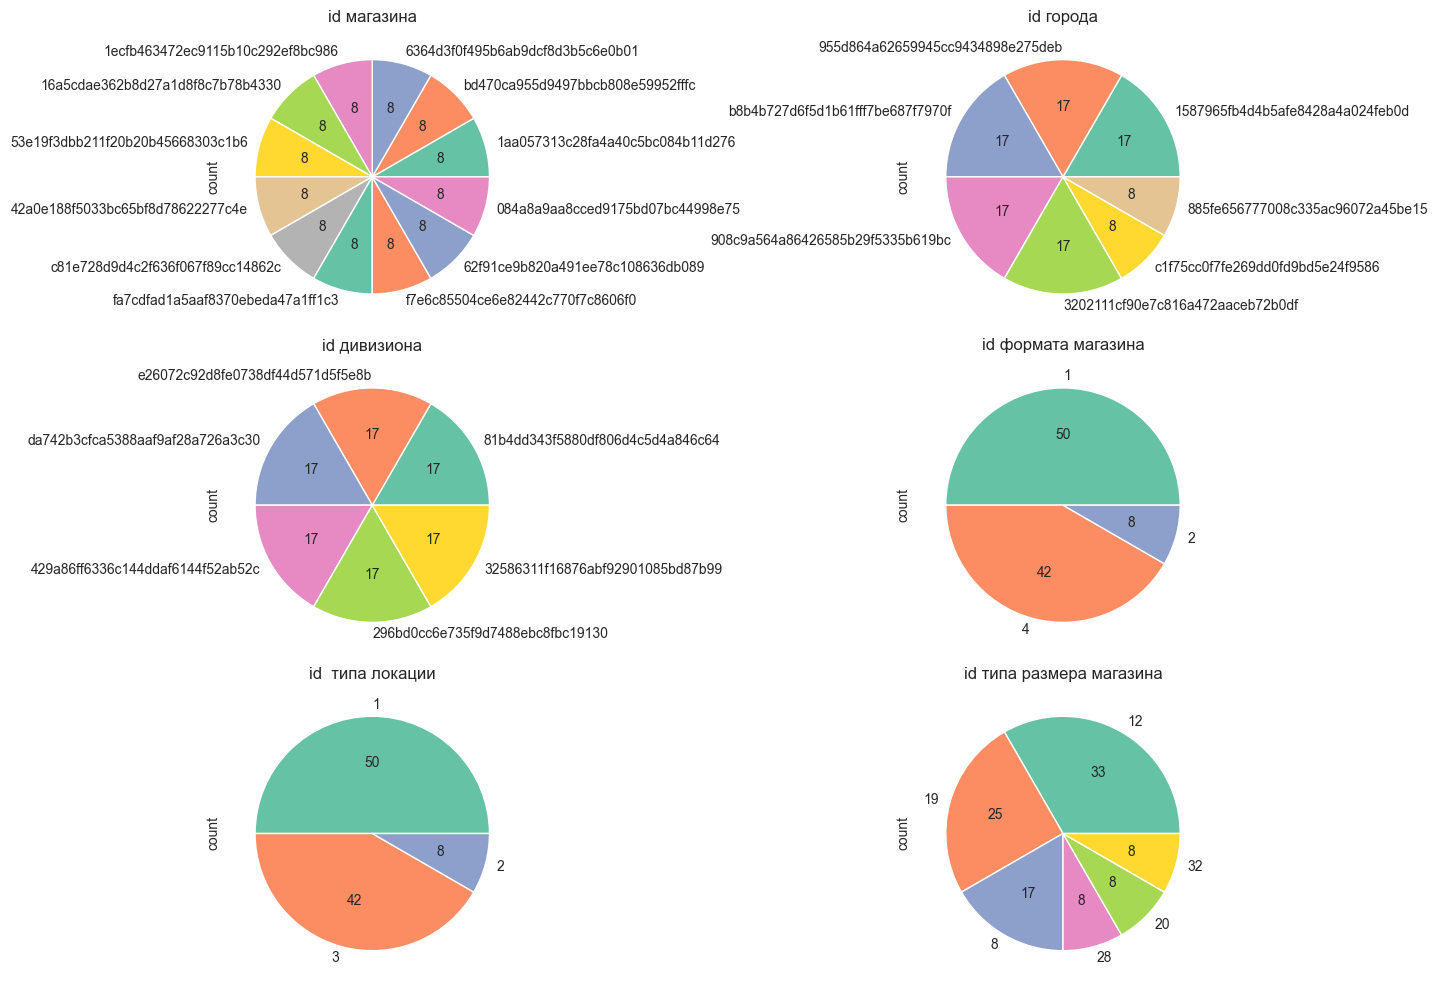

In [45]:
fig, axs = plt.subplots(ncols=2, nrows=3, figsize=(14, 10))
autopct='%.0f'
font_size=10
station.st_id.value_counts().plot.pie(autopct=autopct,fontsize=font_size, ax=axs[0, 0])\
    .set_title('id магазина')
station.st_city_id.value_counts().plot.pie(autopct=autopct, fontsize=font_size, ax=axs[0, 1])\
    .set_title('id города')
station.st_division_code.value_counts().plot.pie(autopct=autopct, fontsize=font_size, ax=axs[1, 0])\
    .set_title('id дивизиона')
station.st_type_format_id.value_counts().plot.pie(autopct=autopct, fontsize=font_size, ax=axs[1, 1])\
    .set_title('id формата магазина')
station.st_type_loc_id.value_counts().plot.pie(autopct=autopct, fontsize=font_size, ax=axs[2, 0])\
    .set_title('id  типа локации')
station.st_type_size_id.value_counts().plot.pie(autopct=autopct, fontsize=font_size, ax=axs[2, 1])\
    .set_title('id типа размера магазина')
fig.tight_layout()

In [46]:
station.st_is_active.value_counts().to_frame()

,count
st_is_active,
1,10
0,2


- 2 магазина из 12 неактивны
- 12 магазинов распределены в равной пропорции примерно по 8%
- представлены 7 городов(на 5 приходится по 17% на 2 по 8%)
- есть 6 дивизионов(равномерно по 17%)
- закодированный формат магазина("1"-50%б "4"-42%, "2"-8%)
- три типа локации("1"-50%б "3"-42%, "2"-8%)
- 6 типов размерности магазинов("12"-33%, "19"-25%, "8"-17%, "20","28","32" - по 8%)

- эту таблицу также соединю с тренировочным датасетом для выявления корреляционных зависимостей.

In [47]:
data = df.merge(prod, on='pr_sku_id').merge(station, on='st_id')

***Разведочный анализ данных:***

- Сначала установлю столбец с датой в качестве индекса, отсортирню по нему весь датасет, проверю индекс на монотонное возрастание
- проведу анализ целевой переменной(количество проданных товаров в шт/кг): выясню как формировать целевую исходя из имеющихся двух столбцов с количеством(проданные с промо и без него)
- получу соотношение суммы продаж в день к количеству и получу признак со средней ценой в день, посмотрю на его распределение
- проведу анализ временных данных
- проведу анализ данных на выявление возможных корреляций целелевой переменной с присоединенными данными из таблиц по товарной иерархии и информации по магазинам
- сделаю выводы

In [48]:
data.index=data.date
data.sort_index(inplace=True)
data.index.is_monotonic_increasing

True

In [49]:
data[(data.pr_sales_in_units==data.pr_promo_sales_in_units)&(data.pr_sales_in_rub==data.pr_promo_sales_in_rub)]\
    .shape[0]/data.shape[0]

0.40122000683772413

- около 40% данных по количеству и сумме продаж идентичны, оставшаяся часть суммы и количества продаж без промо во всех случаях превышает соответствующие значения с флагом промо, отсюда я делаю вывод что признаки количество проданных единиц и продажи в рублях включают в себя соотвествующие количества и суммы продаж с флагом промо
- Итого: целевая переменная количество проданных товаров без признака промо

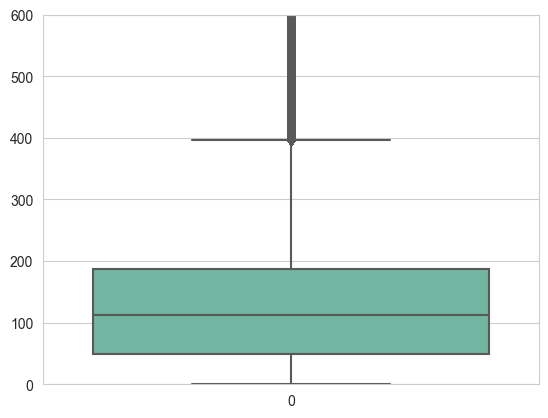

In [58]:
sns.boxplot(data=round(data.pr_sales_in_rub/data.pr_sales_in_units, 1)).set_ylim(0, 600);

In [60]:
round(data.pr_sales_in_rub/data.pr_sales_in_units, 1).median()

113.1

In [61]:
round(data.pr_sales_in_rub/data.pr_sales_in_units, 1).describe()

count    815607.000000
mean        138.856970
std         127.099226
min           0.100000
25%          49.100000
50%         113.100000
75%         187.800000
max        4729.000000
dtype: float64

- распределение отношения суммы продаж/количество продаж: медианное значение 113.1, среднее 138, соотвественно распределение смещено вправо, присутствуют выбросы, обусловленные выбросами признака сумма продаж. Для дальнейшего анализа создам признак со средней ценой за день

In [62]:
data['mean_price'] = round(data.pr_sales_in_rub/data.pr_sales_in_units, 1)

In [67]:
time_analys = data[['pr_sales_in_rub', 'pr_sales_in_units']]

In [71]:
all_decompose = time_analys.resample('1D').sum()

In [72]:
all_decompose

,pr_sales_in_rub,pr_sales_in_units
date,,
2022-08-01,1039972.0,9700.0
2022-08-02,1287612.0,10892.0
2022-08-03,1235558.0,10732.0
2022-08-04,1492363.0,13090.0
2022-08-05,2136551.0,18284.0
...,...,...
2023-07-14,2484847.0,20294.0
2023-07-15,2634285.0,20304.0
2023-07-16,1784873.0,14870.0
